### Binary Classification using Deep Neural Networks

#### (Classify movie reviews into 'positive' & 'negative')

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [5]:
max_words = 10000 # Consider only the top 10,000 most frequent words
max_len = 200 # Limit review length to 200 words

In [6]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_words)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [7]:
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [8]:
model = Sequential([
    Embedding(input_dim=max_words, output_dim=128), # Embedding layer for word representation
    GlobalAveragePooling1D(), # Global average pooling layer to reduce dimensions
    Dense(64, activation='relu'), # Fully connected layer
    Dense(1, activation='sigmoid') # Output layer (binary classification)
])

In [9]:
model.compile(optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy'])

In [10]:
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - accuracy: 0.7224 - loss: 0.5530 - val_accuracy: 0.8584 - val_loss: 0.3211
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step - accuracy: 0.9009 - loss: 0.2540 - val_accuracy: 0.8786 - val_loss: 0.2946
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.9185 - loss: 0.2075 - val_accuracy: 0.8698 - val_loss: 0.3126
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9360 - loss: 0.1727 - val_accuracy: 0.8678 - val_loss: 0.3246
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 31ms/step - accuracy: 0.9486 - loss: 0.1420 - val_accuracy: 0.8173 - val_loss: 0.4075


In [11]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy*100:.2f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8192 - loss: 0.4045
Test Accuracy: 81.73


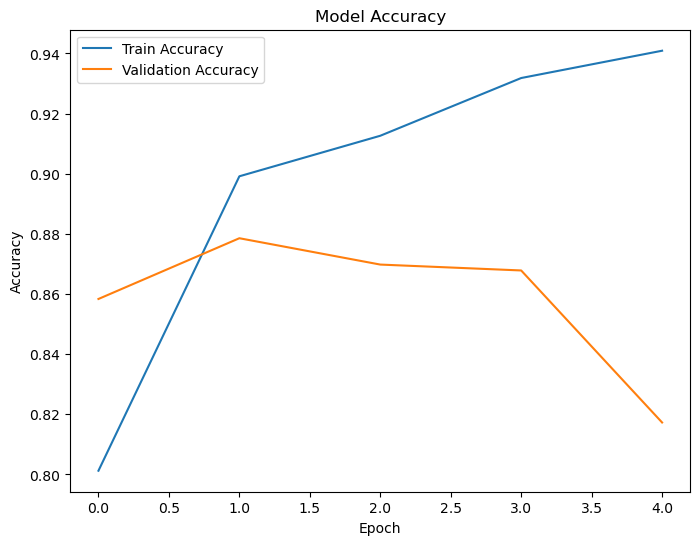

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()